In [34]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

ModuleNotFoundError: No module named 'colors'

In [3]:
X, Y = load_planar_dataset()

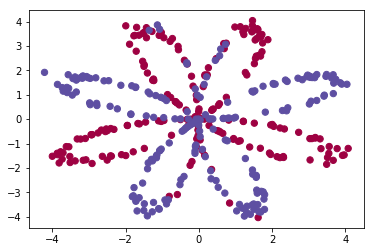

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [5]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]     

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [6]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\Alan Wile\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alan Wile\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

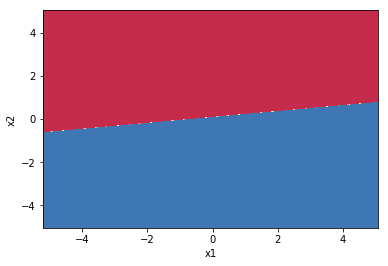

In [7]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [8]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

In [9]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [10]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    b= 0.01
    W1 = np.random.randn(n_h,n_x)* b
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * b
    b2 = np.zeros((n_y,1))

    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
# Probando la Funcion
n_x, n_h, n_y = initialize_parameters_test_case() 
parameters = initialize_parameters(n_x, n_h, n_y) 
print("W1 = " + str(parameters["W1"])) 
print("b1 = " + str(parameters["b1"])) 
print("W2 = " + str(parameters["W2"])) 
print("b2 = " + str(parameters["b2"])) 

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [11]:
def forward_propagation(X, parameters):
     # Recupera cada parámetro del diccionario "parameters" 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# Probando la función
X_assess, parameters = forward_propagation_test_case() 
A2, cache = forward_propagation(X_assess, parameters) 
# Note: Se calcula la media solo para asegurarnos de que su salida coincida 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2'])) 

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [12]:
def compute_cost (A2, Y, parameters):
    m = Y.shape[1]

    cost = -(1/m) * (np.sum(np.multiply(Y,np.log(A2)) + np.multiply((1-Y),(np.log(1-A2))))) 
    cost = np.squeeze(cost)
    assert(isinstance(cost,float))
    
    return cost

A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [13]:
def backward_propagation(parameters, cache, X, Y): 
 
    m = X.shape[1]          
    W1 = parameters["W1"]    
    W2 = parameters["W2"]        
    # Recuperar los datos A1 and A2 del diccionario "cache".     
    A1 = cache["A1"]
    A2 = cache["A2"]             
    # Backward propagation: calcular dW1, db1, dW2, db2.      
    dZ2 =  A2 - Y   
    dW2 =  (1/m) * (np.dot(dZ2,A1.T))
    db2 =  (1/m) * np.sum(dZ2, axis = 1, keepdims = True)   
    dZ1 =  np.dot(W2.T, dZ2) * (1 - np.power(A1,2))   
    dW1 =  (1/m) * np.dot(dZ1, X.T)    
    db1 =  (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,              
             "db1": db1,              
             "dW2": dW2,              
             "db2": db2}          
    
    return grads 

# Probando la función 
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess) 
print ("dW1 = "+ str(grads["dW1"])) 
print ("db1 = "+ str(grads["db1"])) 
print ("dW2 = "+ str(grads["dW2"])) 
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [14]:
def update_parameters(parameters, grads, learning_rate = 1.2): 
  #esta funcon es la gradiente decendiente
    # Retrieve each parameter from the dictionary "parameters"     
    W1 = parameters["W1"]   
    b1 = parameters["b1"]     
    W2 = parameters["W2"]     
    b2 = parameters["b2"]          
    # Retrieve each gradient from the dictionary "grads"     
    dW1 =  grads["dW1"]    
    db1 =  grads["db1"]    
    dW2 =  grads["dW2"]
    db2 =  grads["db2"]         
    # Actualizando los parámetros  
    #para actulizarlos pesos es peso actual menos tasa de aprendizaje por gradeinte
    W1 =  W1 - (learning_rate * dW1)
    b1 =  b1 - (learning_rate * b1)   
    W2 =  W2 - (learning_rate * dW2)    
    b2 =  b2 - (learning_rate * b2)     
 
    parameters = {"W1": W1,                   
                  "b1": b1,                   
                  "W2": W2,                   
                  "b2": b2}          
    return parameters 
 
#Probando la función 
parameters, grads = update_parameters_test_case() 
parameters = update_parameters(parameters, grads) 
 
print("W1 = " + str(parameters["W1"])) 
print("b1 = " + str(parameters["b1"])) 
print("W2 = " + str(parameters["W2"])) 
print("b2 = " + str(parameters["b2"])) 

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ 1.79504691e-07]
 [-1.63112418e-06]
 [-1.20962127e-07]
 [ 5.09121400e-07]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[-1.82990876e-05]]


In [18]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)    
    n_x = layer_sizes(X, Y)[0]    
    n_y = layer_sizes(X, Y)[2]        
    # Llamando a la función: Initialize parameters    
    parameters =  initialize_parameters(n_x, n_h, n_y)   
    W1 =  parameters["W1"]   
    b1 =  parameters["b1"]   
    W2 =  parameters["W2"]   
    b2 =  parameters["b2"]       
    # Loop (gradient descent)    
    for i in range(0, num_iterations):                 
        # Llamando a la función: Forward propagation.         
        A2, cache =  forward_propagation(X, parameters)              
        # Llamando a la función: Cost function.        
        cost = compute_cost(A2, Y, parameters)
        # llamando a la funcion Backpropagation        
        grads = backward_propagation(parameters, cache, X, Y)
        # Llamar a la función Gradient descent parameter update.         
        parameters =  update_parameters(parameters, grads)                       
        # Print the cost every 1000 iterations        
        if print_cost and i % 1000 == 0:            
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters 

In [16]:
def predict(parameters, X):        
    A2, cache = forward_propagation(X, parameters)    
    predictions = np.rint(A2)        
    
    return predictions

parameters, X_assess = predict_test_case() 
predictions = predict(parameters, X_assess) 
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.290950
Cost after iteration 2000: 0.258518
Cost after iteration 3000: 0.236157
Cost after iteration 4000: 0.228791
Cost after iteration 5000: 0.224406
Cost after iteration 6000: 0.221360
Cost after iteration 7000: 0.219111
Cost after iteration 8000: 0.217389
Cost after iteration 9000: 0.216036


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

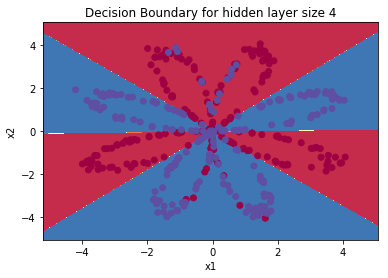

In [19]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True) 
# Plot el límite de decisión 
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0]); 
plt.title("Decision Boundary for hidden layer size " + str(4))

In [30]:
# Print accuracy 
predictions = predict(parameters, X) 
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%') 


Accuracy: 91%


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

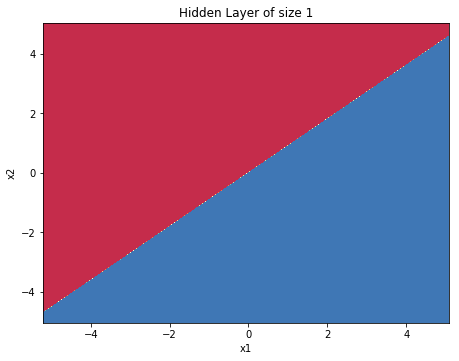

In [51]:
plt.figure(figsize=(16, 32))

hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))